## Exploratory Analysis of Vancouver Crime Data:

### I will explore the Vancouver crime records from 2003 to 2019.
### The dataset is collected from the City of Vancouver's [Open Data Catalogue](https://opendata.vancouver.ca/pages/home/)
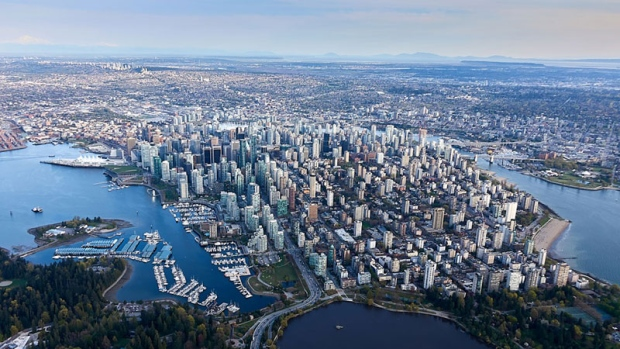

In [1]:
# Import data manipulation packages
import numpy as np
import pandas as pd

## 1. Input Dataset First

In [2]:
# Unzip the vancouver_crime_records_2019.csv file inside vancouver_crime_records_2019.zip and keep in this notebook folder.
crime_records = pd.read_csv("vancouver_crime_records_2019.csv")
crime_records.head()

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2014      8    8     5      13   
4  Break and Enter Commercial  2005     11   14     3       9   

     HUNDRED_BLOCK NEIGHBOURHOOD              X             Y  
0              NaN      Oakridge  491285.000000  5.453433e+06  
1    10XX SITKA SQ      Fairview  490612.964805  5.457110e+06  
2  10XX ALBERNI ST      West End  491007.779775  5.459174e+06  
3  10XX ALBERNI ST      West End  491015.943352  5.459166e+06  
4  10XX ALBERNI ST      West End  491021.385727  5.459161e+06

## 2. Quick dataset summary

### 2.0 Do we have missing data?

In [3]:
# my personal reusable function for detecting missing data
def missing_value_describe(data):
    # check missing values in training data
    missing_value_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_stats > 0)
    missing_value_stats = missing_value_stats.sort_values(ascending=False)[:missing_value_col_count]
    print("Number of columns with missing values:", missing_value_col_count)
    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        print(missing_value_stats)
    else:
        print("No missing data!!!")
missing_value_describe(crime_records)

Number of columns with missing values: 4

Missing percentage (desceding):
NEIGHBOURHOOD    10.409943
Y                 0.019230
X                 0.019230
HUNDRED_BLOCK     0.002083
dtype: float64


### From the above missing data examination, we can we have 4 columns with missing data: they are NEIGHHOURHOOD (10.42% missing), MINUTE(10.02% missing), HOUR(10.02% missing), and HUNDRED_BLOCK(0.002% missing).

### The missing percentage of MINUTE and HOUR columns are the same. That makes sense because they are recorded together. However, the HUNDRED_BLOCk, which is the physical address, has ~10% lower missing value than the NEIGHBOURHOOD column. What can be the cause? It turnes out they "uses the Statistics Canada definition of neighbourhoods within municipalities. Neighbourhoods within the City of Vancouver are based on the census tract (CT) concept within census metropolitan area (CMA)." The missing NEIGHBOURHOOD columns might be caused by unlabeled neighbourhoods in the Statistics Canada dataset or they just aren't labeled.

### I am thinking about create a dictionary for each street-neighbourhood pair to predict the missing neighbourhood. I will do it later.

## 2.1 Dimension of dataset

In [4]:
print("the dimension:", crime_records.shape)

the dimension: (624038, 10)


### We have over 600K rows and 10 columns in our dataset.

## 3. Distribution of each type of crime:

In [5]:
crime_records['TYPE'].value_counts()

Theft from Vehicle                                        209609
Mischief                                                   83970
Break and Enter Residential/Other                          66378
Other Theft                                                64611
Offence Against a Person                                   62078
Theft of Vehicle                                           41528
Break and Enter Commercial                                 38916
Theft of Bicycle                                           31112
Vehicle Collision or Pedestrian Struck (with Injury)       25294
Vehicle Collision or Pedestrian Struck (with Fatality)       290
Homicide                                                     252
Name: TYPE, dtype: int64

Text(0, 0.5, 'crime count')

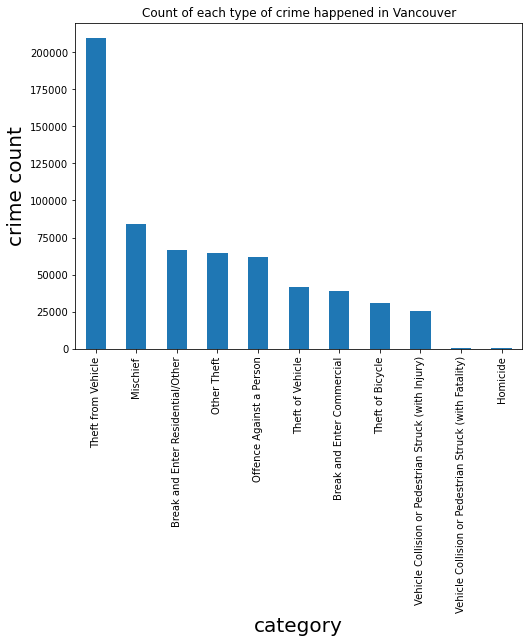

In [6]:
# crime type distribution
nameplot = crime_records['TYPE'].value_counts().plot.bar(title='Count of each type of crime happened in Vancouver', figsize=(8,6))
nameplot.set_xlabel('category',size=20)
nameplot.set_ylabel('crime count',size=20)

In [7]:
import sys
!conda install --yes --prefix {sys.prefix} plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatterpolar(
  r=crime_records['TYPE'].value_counts(),
  theta=crime_records['TYPE'].value_counts().index,
  fill='toself'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
        visible=True
     ),
    ),
    showlegend=False,
    title_text="Vancouver Crime Record Radar Chart by Crime Type",
    autosize=True
)

fig.show()

Solving environment: ...working... done

# All requested packages already installed.



### It appears that the most common type of is associated with vehicle in Vancouver: Theft from Vehicle, Theft of Vehicle, Theft of Bicycle and Vehicle Collision. Since 2003, there are 209609 crime categorized as "Theft from Vehicle".

## 3.1 Has the crime decreased over the years in Vancouver?

In [8]:
"""
Create empty dataframe to store the crime count over the years in Vancouver
"""
# year values
year_labels = sorted(crime_records["YEAR"].unique())

# crime types
crime_types = sorted(crime_records["TYPE"].unique().tolist())

# Create the pandas DataFrame 
crime_count_by_year = pd.DataFrame(columns =["year"]) 
crime_count_by_year["year"] = year_labels
crime_count_by_year

year
0   2003
1   2004
2   2005
3   2006
4   2007
5   2008
6   2009
7   2010
8   2011
9   2012
10  2013
11  2014
12  2015
13  2016
14  2017
15  2018
16  2019

In [9]:
# gather yearly count of crime in Vancouver
for current_type in crime_types:
    current_crime = crime_records[crime_records["TYPE"]==current_type]
    current_crime_counts = current_crime["YEAR"].value_counts(sort=False)
    current_crime_index = current_crime_counts.index.tolist()
    current_crime_index, current_crime_counts = zip(*sorted(zip(current_crime_index, current_crime_counts)))
    crime_count_by_year[current_type] = current_crime_counts
crime_count_by_year

year  Break and Enter Commercial  Break and Enter Residential/Other  \
0   2003                        3197                               6883   
1   2004                        3283                               6538   
2   2005                        2639                               5542   
3   2006                        2844                               5674   
4   2007                        2436                               4996   
5   2008                        2224                               4432   
6   2009                        1858                               3497   
7   2010                        1657                               3270   
8   2011                        1749                               3231   
9   2012                        1687                               3311   
10  2013                        1774                               3025   
11  2014                        2244                               3044   
12  2015                        2457                               3120   
13  2016                        2685                               2996   
14  2017                        2193                               2468   
15  2018                        2025                               2397   
16  2019                        1964                               1954   

    Homicide  Mischief  Offence Against a Person  Other Theft  \
0         18      6391                      3518         2582   
1         22      5601                      3802         2605   
2         22      5062                      3779         2611   
3         17      5184                      4345         2966   
4         19      4810                      4413         3024   
5         18      5276                      4225         3142   
6         18      4429                      3893         3662   
7         10      4506                      3745         3432   
8         15      4828                      3883         3562   
9          8      4243                      3801         3630   
10         7      4191                      3692         3488   
11         9      4518                      3162         4210   
12        15      4191                      3225         4679   
13        12      4600                      3192         5701   
14        17      5391                      3227         5504   
15        15      5744                      3142         4947   
16        10      5005                      3034         4866   

    Theft from Vehicle  Theft of Bicycle  Theft of Vehicle  \
0                17744              1418              6361   
1                18204              1230              6102   
2                16554              1416              5031   
3                14734              1467              3682   
4                12226              1203              3305   
5                11298              1176              2420   
6                10007              1641              1882   
7                 8612              1668              1467   
8                 7435              1517              1094   
9                 8097              1817              1151   
10                8341              2034              1034   
11               10140              2461              1292   
12               10546              3064              1372   
13               12816              2638              1481   
14               12960              2201              1498   
15               15005              2165              1148   
16               14890              1996              1208   

    Vehicle Collision or Pedestrian Struck (with Fatality)  \
0                                                  25        
1                                                  22        
2                                                  33        
3                                                  20        
4                                                  24  

### Let's visualize the change of crime over the years across all the types of crime:

In [10]:
# Create traces
fig = go.Figure()
for current_crime in crime_types:
    current_type_count = crime_count_by_year[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        )
    )
# Edit the layout
fig.update_layout(title='Crimes Over the Years in Vancouver by Type',
                    xaxis_title='Year',
                    yaxis_title='Absolute Change',
                    autosize=True,
                    height=570
                 )

fig.update_layout(legend_orientation="h")

fig.show()

### Percent Change of Crimes Over the Years:

In [11]:
# calculate percent change of crime for each type of crime
crime_count_by_year_percent_change = crime_count_by_year[crime_count_by_year.columns[1:]].pct_change() * 100
crime_count_by_year_percent_change["year"] = year_labels
crime_count_by_year_percent_change

Break and Enter Commercial  Break and Enter Residential/Other   Homicide  \
0                          NaN                                NaN        NaN   
1                     2.690022                          -5.012349  22.222222   
2                   -19.616205                         -15.234017   0.000000   
3                     7.768094                           2.381812 -22.727273   
4                   -14.345992                         -11.949242  11.764706   
5                    -8.702791                         -11.289031  -5.263158   
6                   -16.456835                         -21.096570   0.000000   
7                   -10.818084                          -6.491278 -44.444444   
8                     5.552203                          -1.192661  50.000000   
9                    -3.544883                           2.476014 -46.666667   
10                    5.157084                          -8.637874 -12.500000   
11                   26.493799                           0.628099  28.571429   
12                    9.491979                           2.496715  66.666667   
13                    9.279609                          -3.974359 -20.000000   
14                  -18.324022                         -17.623498  41.666667   
15                   -7.660739                          -2.876823 -11.764706   
16                   -3.012346                         -18.481435 -33.333333   

     Mischief  Offence Against a Person  Other Theft  Theft from Vehicle  \
0         NaN                       NaN          NaN                 NaN   
1  -12.361133                  8.072769     0.890782            2.592426   
2   -9.623282                 -0.604945     0.230326           -9.063942   
3    2.410115                 14.977507    13.596323          -10.994322   
4   -7.214506                  1.565017     1.955496          -17.021854   
5    9.688150                 -4.260140     3.902116           -7.590381   
6  -16.053829                 -7.857988    16.549968          -11.426801   
7    1.738541                 -3.801695    -6.280721          -13.940242   
8    7.146028                  3.684913     3.787879          -13.666976   
9  -12.116819                 -2.111769     1.909040            8.903833   
10  -1.225548                 -2.867666    -3.911846            3.013462   
11   7.802434                -14.355363    20.699541           21.568157   
12  -7.237716                  1.992410    11.140143            4.003945   
13   9.759007                 -1.023256    21.842274           21.524749   
14  17.195652                  1.096491    -3.455534            1.123596   
15   6.547950                 -2.634025   -10.119913           15.779321   
16 -12.865599                 -3.437301    -1.637356           -0.766411   

    Theft of Bicycle  Theft of Vehicle  \
0                NaN               NaN   
1         -13.258110         -4.071687   
2          15.121951        -17.551622   
3           3.601695        -26.813755   
4         -17.995910        -10.239001   
5          -2.244389        -26.777610   
6          39.540816        -22.231405   
7           1.645338        -22.051010   
8          -9.052758        -25.426040   
9          19.775873          5.210238   
10         11.942763        -10.165074   
11         20.993117         24.951644   
12         24.502235          6.191950   
13        -13.903394          7.944606   
14        -16.565580          1.147873   
15         -1.635620        -23.364486   
16         -7.806005          5.226481   

    Vehicle Collision or Pedestrian Struck (with Fatality)  \
0                                                 NaN        
1                                          -12.000000        
2                                           50.000000        
3                                          -39.393939        
4                                           20.000000        
5                                          -29.166667        
6  

In [12]:
# Create traces
fig = go.Figure()
for current_crime in crime_types:
    current_type_count = crime_count_by_year_percent_change[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        )
    )
# Edit the layout
fig.update_layout(title='Percent Change of Crimes Over the Years in Vancouver by Type',
                    xaxis_title='Year',
                    yaxis_title='Percent Change (%)',
                    autosize=True,
                    height=570
                 )
fig.update_layout(legend_orientation="h")
fig.show()

### Using the percentage equals 0 as your reference, you will observe that the crimes of "Vehicle Collision or Pedestrain Struck (with Fatality)", "Theft of Bicyle", and "Homicide" has realtive more positive percentage changes through the years.

In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=6, cols=2,
    subplot_titles=[str(i+1) + ". " + crime_types[i] for i in range(len(crime_types))]
)

# function to update row and col for adding subplots
current_row = 1
current_col = 1
def update_row_col(current_row, current_col):
    if current_col < 2:
        current_col += 1
    else:
        current_col = 1
        current_row += 1
    return current_row, current_col

# add trace to the subplot
current_count = 1
for current_crime in crime_types:
    current_type_count = crime_count_by_year[current_crime]
    fig.add_trace(
        go.Scatter(
            x=year_labels, 
            y=current_type_count,
            mode='lines+markers',
            name=current_crime
        ),
        row=current_row, col=current_col
    )
    current_row, current_col = update_row_col(current_row, current_col)

fig.update_layout(
    height=1500, 
    width=900,
    title_text="Crimes in Vancouver Over the Years"
)

fig.update_layout(legend_orientation="h")
fig.show()

## 4. Crime records by month:

### 4.1 What months have the most of the crimes recorded?

Text(0, 0.5, 'crime count')

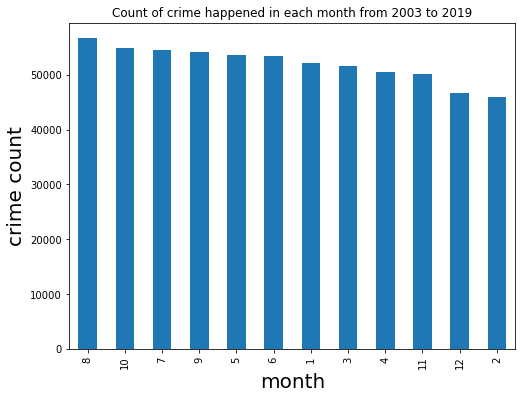

In [14]:
nameplot = crime_records["MONTH"].value_counts().plot.bar(title='Count of crime happened in each month from 2003 to 2019', figsize=(8,6))
nameplot.set_xlabel('month',size=20)
nameplot.set_ylabel('crime count',size=20)

### It appears that the months of summer time has more crime recorded than other months.

Text(0, 0.5, 'crime count')

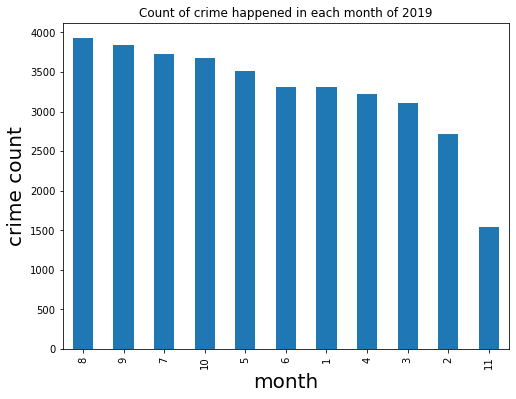

In [15]:
nameplot = crime_records[crime_records["YEAR"] == 2019]["MONTH"].value_counts().plot.bar(title='Count of crime happened in each month of 2019', figsize=(8,6))
nameplot.set_xlabel('month',size=20)
nameplot.set_ylabel('crime count',size=20)

### 4.2 What are the count of each type of crime happened in each month in 2018?

In [16]:
# get record by month
def get_record_by_month(month_num):
    return crime_records[(crime_records["YEAR"] == 2018) & (crime_records["MONTH"] == month_num)]

# get data in this month
month_dict = {
    1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June",
    7: "July", 8: "August", 9: "September", 10: "October", 11: "November", 12: "December"
}
for month in sorted(crime_records["MONTH"].unique()):
    y = get_record_by_month(month)["TYPE"].value_counts()
    x = y.index.tolist()
    x, y = zip(*sorted(zip(x, y)))
    fig = go.Figure([go.Bar(x=x, y=y, text=y, textposition = 'outside')])
    fig.update(layout_title_text="Count of each type of crime happened in " + month_dict[month])
    fig.update_layout(
        yaxis=go.layout.YAxis(title=go.layout.yaxis.Title(text="Crime Count")),
        autosize=True,
        width=880,
        height=700,
    )
#     fig.update_xaxes(tickangle=-90)
    fig.show()

### Overall, "Theft from Vehicle" remains to be the main type of crime happened in Vancouver in 2018 through the months. The 2nd and the 3rd most common crimes are "Mischief" and "Offence Against a Person" in 2018.

## 5. Crime investigation based on location data

### We have 4 columns describe the locations of the given crime records. They are: HUNDRED_BLOCK, NEIGHBOURHOOD, X, and Y. Let's explore these columns now. 

### 5.1 How many unique blocks do we have?

In [17]:
len(crime_records["HUNDRED_BLOCK"].unique())

22181

### That's a lot of blocks! Let's find out:
### 5.2 What are the top 10 crime populated block based on crime data?

Text(26.200000000000003, 0.5, 'count')

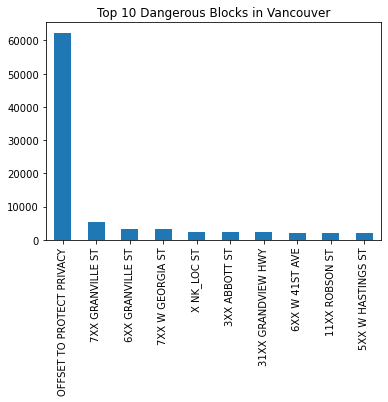

In [18]:
crime_records["HUNDRED_BLOCK"].value_counts()[:10].plot.bar(
    title='Top 10 Dangerous Blocks in Vancouver')
nameplot.set_xlabel('block name',size=20)
nameplot.set_ylabel('count',size=20)

### To protect privacy, police labeled about 10% of the data to be "OFFSET TO PROTECT PRIVACY". Let's graph the top 10 crime-populated block without the "OFFSET TO PROTECT PRIVACY" rows. 

Text(26.200000000000003, 0.5, 'count')

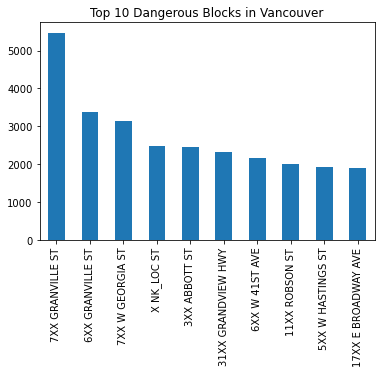

In [19]:
crime_records["HUNDRED_BLOCK"].value_counts()[1:11].plot.bar(
    title='Top 10 Dangerous Blocks in Vancouver')
nameplot.set_xlabel('block name',size=20)
nameplot.set_ylabel('count',size=20)

### Granville street seems to be very dangerous from the above visualization.

### Well, 60K of 609K rows of data are offsetted to protect privacy. We won't be able to use those data because the HUNDRED_BLOCK, NEIGHBOURHOOD data, X, and Y data will be inaccurate to describe the crime happened in Vancouver from 2003 to 2019. Let's create a new dataframe with usable data that's not labeled as "OFFSET TO PROTECT PRIVACY".

In [20]:
crime_records_without_offset = crime_records[crime_records["HUNDRED_BLOCK"] != "OFFSET TO PROTECT PRIVACY"]
crime_records_without_offset.shape

(561708, 10)

In [21]:
crime_records_without_offset.head()

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE  \
0  Break and Enter Commercial  2012     12   14     8      52   
1  Break and Enter Commercial  2019      3    7     2       6   
2  Break and Enter Commercial  2019      8   27     4      12   
3  Break and Enter Commercial  2014      8    8     5      13   
4  Break and Enter Commercial  2005     11   14     3       9   

     HUNDRED_BLOCK NEIGHBOURHOOD              X             Y  
0              NaN      Oakridge  491285.000000  5.453433e+06  
1    10XX SITKA SQ      Fairview  490612.964805  5.457110e+06  
2  10XX ALBERNI ST      West End  491007.779775  5.459174e+06  
3  10XX ALBERNI ST      West End  491015.943352  5.459166e+06  
4  10XX ALBERNI ST      West End  491021.385727  5.459161e+06

### 5.3 Let's build a simple classification model to predict the missing NEIGHBOURHOOD column's data to see if it's viable or not.

### We are not interested in block number anymore. Let's remove the number by stripping the first block before the first white space in the HUNDRED_BLOCK data.

In [22]:
# drop missing row in crime record where only 0.002% of HUNDRED_BLOCK row are missing
crime_records_without_offset = crime_records_without_offset[pd.notnull(crime_records_without_offset["HUNDRED_BLOCK"])]

In [23]:
block_names = crime_records_without_offset["HUNDRED_BLOCK"]
block_names.isnull().sum() # make sure we don't have missing row for HUNDRED_BLOCK now

0

### If the street number's first character is a number and the street's name has more than 2 word, I remove the street number from it.
### Reason:
#### 1. The street name's beginning can a letter which is not a street number. I don't want the location information lost through this preprocessing process.
#### 2. The street name can be 2 words only such as Hasting Street. I don't want the first word to be lost and let the dataset only contains the "street" part.

In [24]:
def remove_street_number(street_name):
    # if the beginning is a digit and the street name contains more than 2 words
    if street_name[0].isdigit() and len(street_name.split(" ")) > 2:
        _, _, tail = street_name.partition(" ")
        return tail
    return street_name

# apply the above function to remove the street number in each row
crime_records_without_offset["HUNDRED_BLOCK"] = block_names.apply(remove_street_number)

In [25]:
crime_records_without_offset["HUNDRED_BLOCK"].head()

1      SITKA SQ
2    ALBERNI ST
3    ALBERNI ST
4    ALBERNI ST
5    ALBERNI ST
Name: HUNDRED_BLOCK, dtype: object

### We have successfully removed the block number. Now, let's associate the block name to the neighbourhood data to create a dictionary to check whether the missing neighbourhood data's street has association with existing block already.

In [26]:
street_with_missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
street_with_missing_neighbourhood

X NK_LOC ST                    2488
GRANVILLE STREET BRDG             4
BURRARD STREET BRDG               3
E HASTINGS ST / CASSIAR ST        2
BLOCK BOUNDARY RD                 2
                               ... 
KNIGHT ST BRIDGE                  1
PACIFIC BLVD / 198 DRAKE ST       1
GRANVILLE STREET BRIDGE           1
BLOCK JOYCE ST                    1
FRASER ST AND KINGSWAY AVE        1
Name: HUNDRED_BLOCK, Length: 133, dtype: int64

### What is "NK_LOC ST"?
### The Vancouver city website states it is default location value used for incidents with unknown location. Let's drop them for our spatial anaylsis.

In [27]:
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="X NK_LOC ST"]
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!='X NK_LOC ST "SQUAMISH"']
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!='X NK_LOC ST "UBC"']

In [28]:
street_with_missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
street_with_missing_neighbourhood

GRANVILLE STREET BRDG           4
BURRARD STREET BRDG             3
BLOCK BOUNDARY RD               2
CAMBIE STREET BRDG              2
CAMBIE ST BRIDGE                2
                               ..
ST GEORGE ST / 499 E 18TH AV    1
FIR ST / W 14 TH AV             1
BLOCK DUNDAS ST                 1
W 70TH AV / 8599 LAUREL ST      1
BLOCK ARLINGTON ST              1
Name: HUNDRED_BLOCK, Length: 130, dtype: int64

### Create a dictionary of block-neighbourhood pair

In [29]:
street_neighbour_dict = {}

# iterate over rows with iterrows()
for index, row in crime_records_without_offset.iterrows():
    # access data using column names
    if pd.isnull(row["NEIGHBOURHOOD"]) == False:
        street_neighbour_dict[row["HUNDRED_BLOCK"]] = row["NEIGHBOURHOOD"]

In [30]:
# checking if the missing neighbourhood value for existing street is included
# in the dictionary I created above
existed_street_block_association = []
count = 0
for name in street_with_missing_neighbourhood.index.tolist():
    existed = False
    if name in street_neighbour_dict:
        existed_street_block_association.append(name)
        existed = True
        count += 1
print(count, "names are are existed in the dictionary")

27 names are are existed in the dictionary


In [31]:
existed_street_block_association

['GRANVILLE STREET BRDG',
 'BURRARD STREET BRDG',
 'BLOCK BOUNDARY RD',
 'CAMBIE STREET BRDG',
 'E HASTINGS ST / CASSIAR ST',
 'GRANVILLE ST BRIDGE',
 'BLOCK MAIN ST',
 'BLOCK JOYCE ST',
 'BLOCK E HASTINGS ST',
 'SE MARINE DR / MARINE WAY',
 'CLARK DR',
 'GRANVILLE BRDG',
 'KNIGHT STREET BRDG',
 'TERMINAL AVE / QUEBEC ST',
 'BRIDGEWAY ST',
 'LIONS GATE BRDG',
 'BLOCK SW MARINE DR',
 'CAMBIE ST / W 12TH AVE',
 'BLOCK CAMBIE ST',
 'DUNSMUIR VIA',
 'FRASER ST / GREAT NORTHERN WAY',
 'PRIOR ST',
 'CASSIAR ST / E HASTINGS ST',
 'BLANCA ST / W 16TH AVE',
 'SE MARINE DR / ELLIOTT ST',
 'BLOCK ST GEORGE ST',
 'BLOCK DUNDAS ST']

### Let's assign the street-neighbourhood dictionary values to fill the missing values.

In [32]:
# fill missing neighbourhood value with dictionary created above
for name in existed_street_block_association:
    crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"] == name, "NEIGHBOURHOOD"] = street_neighbour_dict[name]

In [33]:
# reusable function to check the missing neighbourhood value
def missing_neighbourhood_val_count():
    return crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"].isnull()]["HUNDRED_BLOCK"].value_counts()
missing_neighbourhood_val_count()

CAMBIE ST BRIDGE                2
SW MARINE DR / TAMATH CRES      2
VANNESS AVE AND JOYCE ST        1
BALFOUR AV / 3800 OAK ST        1
GRANDVIEW HWY / TEMPLETON ST    1
                               ..
HWY 1/BOUNDARY RD               1
EAST BROADWAY/QUEBEC ST         1
FIR ST / W 14 TH AV             1
W 70TH AV / 8599 LAUREL ST      1
BLOCK ARLINGTON ST              1
Name: HUNDRED_BLOCK, Length: 103, dtype: int64

### We have 5 rows left. Let's look at online neighbourhood map and the dataset before I remove the street number to assign NEIGHBOURHOOD column value to them.
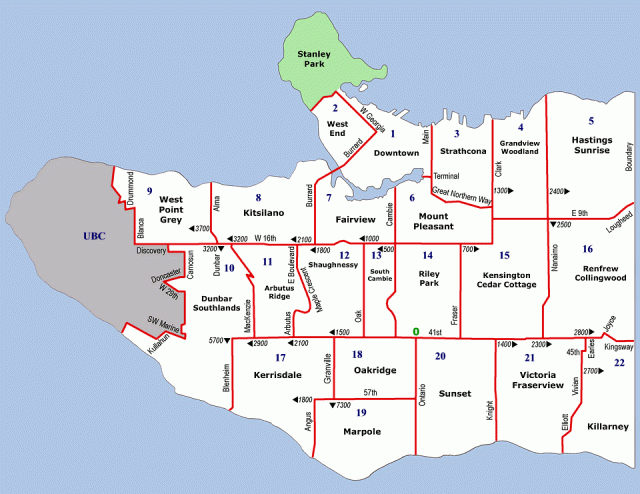

### After reviewing openStreetMap, I found out that:
#### 1. MARINE DR / TAMATH CRES is belong to the Dunbar-southlands neighbourhood, althought it's within the edge of UBC area.

In [34]:
crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"]=="SW MARINE DR / TAMATH CRES","NEIGHBOURHOOD"] = "Dunbar-Southlands"
missing_neighbourhood_val_count()

CAMBIE ST BRIDGE                2
HWY 91 / 72ND AVE               1
BALFOUR AV / 3800 OAK ST        1
GRANDVIEW HWY / TEMPLETON ST    1
W GEORGIA ST / 698 HORNBY ST    1
                               ..
HWY 1/BOUNDARY RD               1
EAST BROADWAY/QUEBEC ST         1
FIR ST / W 14 TH AV             1
W 70TH AV / 8599 LAUREL ST      1
BLOCK ARLINGTON ST              1
Name: HUNDRED_BLOCK, Length: 102, dtype: int64

#### 2. Victoria Avenue is actually belong to a city called White Rock. From the Vancouver neighbourhood map, it's not included. Let's drop it from the dataset.

In [35]:
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="BLOCK VICTORIA AVE"]
missing_neighbourhood_val_count()

CAMBIE ST BRIDGE             2
WEST 4TH AV                  1
WEST 71ST AV/HUDSON ST       1
E 2ND AV / 1800 NOOTKA ST    1
BALFOUR AV / 3800 OAK ST     1
                            ..
RENFREW ST / MCGILL ST       1
HWY 1/BOUNDARY RD            1
EAST BROADWAY/QUEBEC ST      1
FIR ST / W 14 TH AV          1
BLOCK ARLINGTON ST           1
Name: HUNDRED_BLOCK, Length: 101, dtype: int64

### 3. Granville St / 58th Avenue belongs to the Kerrisdale neighbourhood.

In [36]:
crime_records_without_offset.loc[crime_records_without_offset["HUNDRED_BLOCK"]=="GRANVILLE ST / 58TH AVE","NEIGHBOURHOOD"] = "Kerrisdale"
missing_neighbourhood_val_count()

CAMBIE ST BRIDGE                2
WEST 4TH AV                     1
BL E 45TH AV                    1
BALFOUR AV / 3800 OAK ST        1
GRANDVIEW HWY / TEMPLETON ST    1
                               ..
HWY 1/BOUNDARY RD               1
EAST BROADWAY/QUEBEC ST         1
FIR ST / W 14 TH AV             1
W 70TH AV / 8599 LAUREL ST      1
BLOCK ARLINGTON ST              1
Name: HUNDRED_BLOCK, Length: 100, dtype: int64

### S / L block intersection is actually 30 minutes drive away from Hastings Street. Let's not replace value for now since it's only 1 of 600K data row. I will assign neighbourhood value to it after I examine the longtitude and latitude data later.

In [37]:
crime_records_without_offset["NEIGHBOURHOOD"].unique()

array(['Fairview', 'West End', 'Central Business District',
       'Hastings-Sunrise', 'Kensington-Cedar Cottage',
       'Grandview-Woodland', 'Kitsilano', 'Sunset', 'Mount Pleasant',
       'Strathcona', 'Stanley Park', 'Shaughnessy', 'Marpole', 'Oakridge',
       'West Point Grey', 'Victoria-Fraserview', 'Kerrisdale',
       'Riley Park', 'Arbutus Ridge', 'Renfrew-Collingwood', 'Killarney',
       'Dunbar-Southlands', 'South Cambie', 'Musqueam', nan], dtype=object)

### 5.4 Top 10 most dangerous neighbourhood in Vancouver

Text(26.200000000000003, 0.5, 'count')

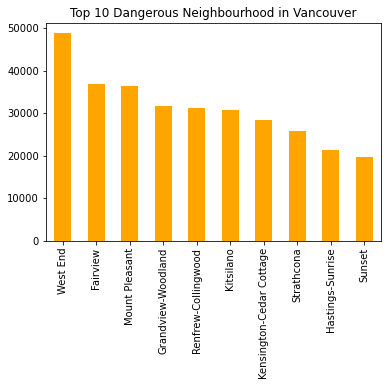

In [38]:
crime_records["NEIGHBOURHOOD"].value_counts()[1:11].plot.bar(
    title='Top 10 Dangerous Neighbourhood in Vancouver', color="orange")
nameplot.set_xlabel('neighhourhood name',size=20)
nameplot.set_ylabel('count',size=20)

### It turns out the most crime populated neighbourhood is West End.


### Let's use a treemap to visualize crimes in West End:

In [39]:
# pip install squarify  Run this command if squarify not install at command prompt before running this.
import squarify
import matplotlib.colors
import matplotlib.cm

# crimes in west end
west_end_crimes = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]
values = west_end_crimes["TYPE"].value_counts()
labels = values.index.tolist()
labels

['Theft from Vehicle',
 'Other Theft',
 'Mischief',
 'Break and Enter Residential/Other',
 'Theft of Bicycle',
 'Break and Enter Commercial',
 'Theft of Vehicle',
 'Vehicle Collision or Pedestrian Struck (with Injury)',
 'Vehicle Collision or Pedestrian Struck (with Fatality)']

In [40]:
values

Theft from Vehicle                                        20401
Other Theft                                                7256
Mischief                                                   6418
Break and Enter Residential/Other                          3649
Theft of Bicycle                                           3449
Break and Enter Commercial                                 3304
Theft of Vehicle                                           2881
Vehicle Collision or Pedestrian Struck (with Injury)       1347
Vehicle Collision or Pedestrian Struck (with Fatality)        8
Name: TYPE, dtype: int64

### 8 of 1328 collision resulted fatality. The "or" really makes the data unclear and they didn't state the total death count.

### Let's combine the last two element of the list together and reduce the string length for better visualization.

In [41]:
labels.pop()
labels[-1] = "Veh. Collis/ Ped Struck"
labels

['Theft from Vehicle',
 'Other Theft',
 'Mischief',
 'Break and Enter Residential/Other',
 'Theft of Bicycle',
 'Break and Enter Commercial',
 'Theft of Vehicle',
 'Veh. Collis/ Ped Struck']

In [42]:
values[-2] += values[-1]
values = values[:len(values)-1]
values

Theft from Vehicle                                      20401
Other Theft                                              7256
Mischief                                                 6418
Break and Enter Residential/Other                        3649
Theft of Bicycle                                         3449
Break and Enter Commercial                               3304
Theft of Vehicle                                         2881
Vehicle Collision or Pedestrian Struck (with Injury)     1355
Name: TYPE, dtype: int64

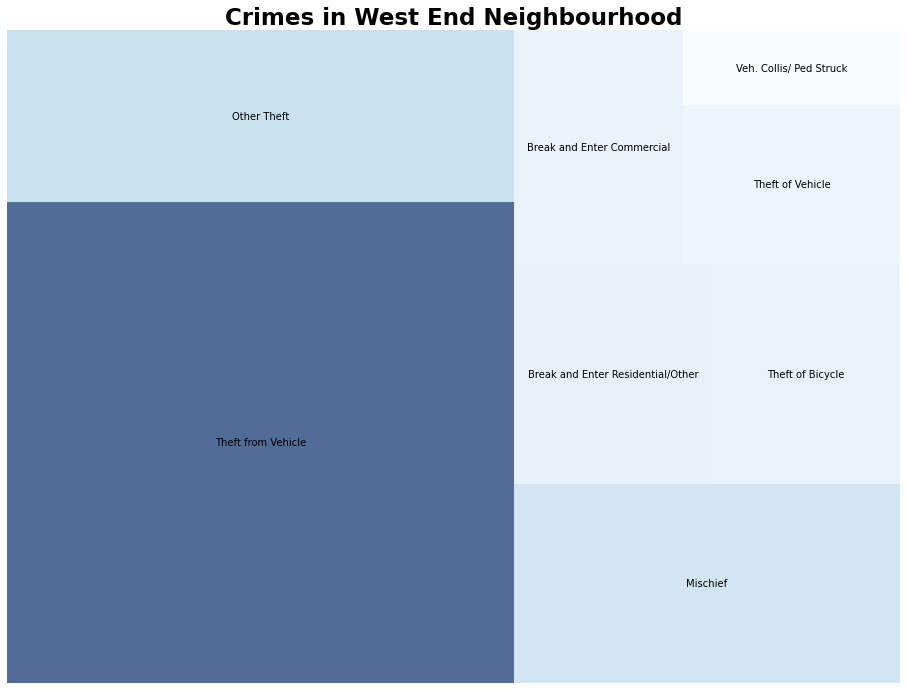

In [43]:
import matplotlib.pyplot as plt

# color of the treemap
norm = matplotlib.colors.Normalize(vmin=min(values), vmax=max(values))
colors = [matplotlib.cm.Blues(norm(value)) for value in values]

#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 12)
squarify.plot(sizes=values, label=labels, color = colors, alpha=0.7)
plt.title("Crimes in West End Neighbourhood",fontsize=23,fontweight="bold")
plt.axis('off')
plt.show()

### Let's take a look the x and y values of the crime happened in West End neighbourhood.

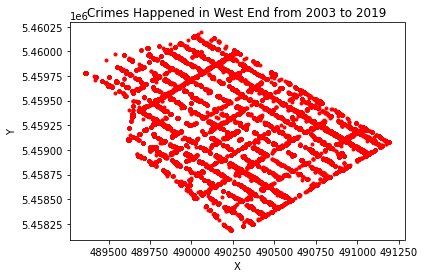

In [44]:
west_end_X = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y = crime_records_without_offset[crime_records_without_offset["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X,west_end_Y, color="red", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End from 2003 to 2019') 
plt.show()

### The scatter plot is actually the shape of the West End neighbourhood.

### Crimes happened on almost every street of West End from 2003 to 2019.

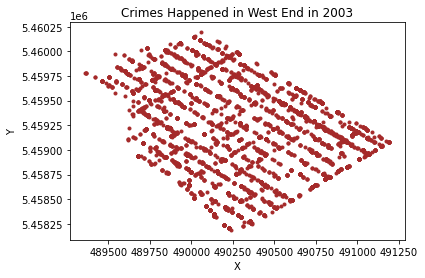

In [45]:
cimes_2003 = crime_records_without_offset[crime_records_without_offset["YEAR"]==2003]
west_end_X_2003 = cimes_2003[cimes_2003["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y_2003 = cimes_2003[cimes_2003["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X_2003,west_end_Y_2003, color="brown", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End in 2003') 
plt.show()

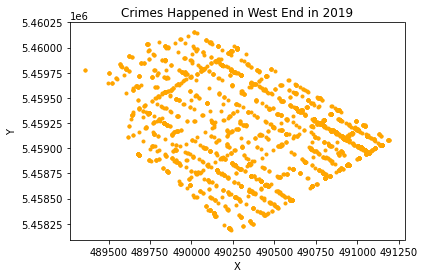

In [46]:
cimes_2019 = crime_records_without_offset[crime_records_without_offset["YEAR"]==2019]
west_end_X_2019 = cimes_2019[cimes_2019["NEIGHBOURHOOD"]=="West End"]["X"]
west_end_Y_2019 = cimes_2019[cimes_2019["NEIGHBOURHOOD"]=="West End"]["Y"]
plt.scatter(west_end_X_2019,west_end_Y_2019, color="orange", marker=".")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Crimes Happened in West End in 2019') 
plt.show()

### Comparing the X, and Y of records from West End, the above plots show the crimes scattered through the neighbourhood and depicted almost the full street map of the West End neighbourhood.

## 6. Vancouver Crimes Heatmap with Folium 
### Convert UTM to Longtitude and Latitude system.
### See my Github repository: https://github.com/KangboLu/UTM-to-Longtitude-Latitude-System

In [47]:
import math

def utmToLatLong(utmEasting, utmNorthing, utmZone):
    eastingOffset = 500000.0
    northingOffset = 10000000.0
    k0 = 0.9996
    equatorialRadius = 6378137.0
    eccSquared = 0.006694380023
    eccPrimeSquared = eccSquared / (1 - eccSquared)
    e1 = (1 - math.sqrt(1 - eccSquared)) / (1 + math.sqrt(1 - eccSquared));
    rad2deg = 180.0/math.pi

    # Casts input from string to floats or ints
    # Removes 500,000 metre offset for longitude
    xUTM = float(utmEasting) - eastingOffset
    yUTM = float(utmNorthing)
    zoneNumber = int(utmZone)

    # Finds the origin longitude for the zone
    lonOrigin = (zoneNumber - 1) * 6 - 180 + 3 # +3 puts in zone centre

    M = yUTM / k0 #This finds the meridional arc
    mu = M / (equatorialRadius * (1- eccSquared / 4 - 3 * eccSquared * eccSquared / 64 -5 * eccSquared * eccSquared * eccSquared /256))

    # Calculates the footprint latitude
    phi1Rad = mu + (3 * e1 / 2 - 27 * e1 * e1 * e1 /32) * math.sin(2*mu) + ( 21 * e1 * e1 / 16 - 55 * e1 * e1 * e1 * e1 / 32) * math.sin( 4 * mu) + (151 * e1 * e1 * e1 / 96) * math.sin(6 * mu)
    phi1 = phi1Rad * rad2deg

    # Variables for conversion equations
    N1 = equatorialRadius / math.sqrt( 1 - eccSquared * math.sin(phi1Rad) *  math.sin(phi1Rad))
    T1 = math.tan(phi1Rad) * math.tan(phi1Rad)
    C1 = eccPrimeSquared * math.cos(phi1Rad) * math.cos(phi1Rad)
    R1 = equatorialRadius * (1 - eccSquared) / math.pow(1 - eccSquared * math.sin(phi1Rad) * math.sin(phi1Rad), 1.5)
    D = xUTM / (N1 * k0)

    # Calculate latitude, in decimal degrees
    lat = phi1Rad - ( N1 * math.tan(phi1Rad) / R1) * (D * D / 2 - (5 + 3 * T1 + 10 * C1 - 4 * C1 * C1 - 9 * eccPrimeSquared) * D * D * D * D / 24 + (61 + 90 * T1 + 298 * C1 + 45 * T1 * T1 - 252 * eccPrimeSquared - 3 * C1 * C1) * D * D * D * D * D * D / 720)
    lat = lat * rad2deg
    
    # Calculate longitude, in decimal degrees
    lon = (D - (1 + 2 * T1 + C1) * D * D * D / 6 + (5 - 2 * C1 + 28 * T1 - 3 * C1 * C1 + 8 * eccPrimeSquared + 24 * T1 * T1) * D * D * D * D * D / 120) / math.cos(phi1Rad)
    lon = lonOrigin + lon * rad2deg
    
    return lon, lat

In [48]:
crime_records_without_offset = crime_records_without_offset.reset_index(drop=True)

In [49]:
crimes_vancouver_X = crime_records_without_offset["X"]
crimes_vancouver_Y = crime_records_without_offset["Y"]
longtitude = []
latitude = []
for i in range(len(crimes_vancouver_X)):
    lon, lat = utmToLatLong(crimes_vancouver_X[i], crimes_vancouver_Y[i], 10)
    longtitude.append(lon)
    latitude.append(lat)

In [50]:
crime_records_without_offset["LONGTITUDE"] = longtitude
crime_records_without_offset["LATITUDE"] = latitude
crime_records_without_offset.head()

TYPE  YEAR  MONTH  DAY  HOUR  MINUTE HUNDRED_BLOCK  \
0  Break and Enter Commercial  2019      3    7     2       6      SITKA SQ   
1  Break and Enter Commercial  2019      8   27     4      12    ALBERNI ST   
2  Break and Enter Commercial  2014      8    8     5      13    ALBERNI ST   
3  Break and Enter Commercial  2005     11   14     3       9    ALBERNI ST   
4  Break and Enter Commercial  2006      5   21     4      50    ALBERNI ST   

  NEIGHBOURHOOD              X             Y  LONGTITUDE   LATITUDE  
0      Fairview  490612.964805  5.457110e+06 -123.129029  49.266678  
1      West End  491007.779775  5.459174e+06 -123.123649  49.285255  
2      West End  491015.943352  5.459166e+06 -123.123536  49.285181  
3      West End  491021.385727  5.459161e+06 -123.123461  49.285132  
4      West End  491021.385727  5.459161e+06 -123.123461  49.285132

### We have the latitude and longtitude value now! let's find out where should the neighbourhood be for the record with "S / L 300 BLK E HASTINGS ST" HUNDRED_BLOCK value.

In [51]:
missing_neighbourhood = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]=="S / L 300 BLK E HASTINGS ST"]
missing_neighbourhood_Lon = missing_neighbourhood["LONGTITUDE"]
missing_neighbourhood_Lat = missing_neighbourhood["LATITUDE"]
lat_lon_pair = list(zip(missing_neighbourhood_Lat, missing_neighbourhood_Lon))
print("Latitude and Longtitude of the missing neighbourhood row")
lat_lon_pair

Latitude and Longtitude of the missing neighbourhood row


[(49.75531925010842, -124.54975724974244)]

### I will use folium for heatmap and clusterMarker data visualization

In [52]:
import folium
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

In [53]:
print("Where is the missing neighbourhood row located?")
missing_neighbourhood_vis = folium.Map(location= [49.4985,-123.8159], 
                           tiles = "Stamen Terrain",
                           zoom_start = 9)
popups = ["Missing Neighbourhood Record"]
MarkerCluster(lat_lon_pair, popups=popups).add_to(missing_neighbourhood_vis)
missing_neighbourhood_vis

Where is the missing neighbourhood row located?


### It turns out that's far away from the city of Vancouver. Let's consider it as an outlier and remove it from the dataset. 

In [54]:
# not include the row in our analysis
crime_records_without_offset = crime_records_without_offset[crime_records_without_offset["HUNDRED_BLOCK"]!="S / L 300 BLK E HASTINGS ST"]
crime_records_without_offset = crime_records_without_offset.reset_index(drop=True) # reset index
missing_neighbourhood_val_count() # checking missing neighbourhood value

CAMBIE ST BRIDGE                    2
E 49TH AV / 6499 NANAIMO ST         1
BLOCK S E MARINE DR                 1
NANAIMO ST / 1ST AV                 1
HEMLOCK ST / WEST BROADWAY          1
                                   ..
X NK_LOC ST  "1000 STOVOLD LANE"    1
W 66TH AV / 8200 ASH ST             1
W BOULEVARD / W 41ST AV             1
SOUTH LANE 0 E 12TH AVE             1
NANAIMO ST / E 41 ST AVE            1
Name: HUNDRED_BLOCK, Length: 99, dtype: int64

In [55]:
missing_value_describe(crime_records_without_offset)

Number of columns with missing values: 5

Missing percentage (desceding):
LATITUDE         0.021459
LONGTITUDE       0.021459
Y                0.021459
X                0.021459
NEIGHBOURHOOD    0.017883
dtype: float64


In [56]:
crime_records_without_offset = crime_records_without_offset.dropna()

In [57]:
missing_value_describe(crime_records_without_offset)

Number of columns with missing values: 0
No missing data!!!


### We don't have row with missing neighbourhood value now!

In [58]:
# return a list of latitude and longtitude data based on specified year
def get_record_locations_by_year(year):
    lat = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]["LATITUDE"]
    lon = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]["LONGTITUDE"]
    return list(zip(lat, lon))

### Let's take a look at the crime heatmap of 2019 so far
### Feel free to zoom in!

In [59]:
latlon_2019 = get_record_locations_by_year(2019)
crime_heatmap = folium.Map(location= [49.24, -123.11], 
                           tiles = "Stamen Toner",
                           zoom_start = 12)
HeatMap(latlon_2019).add_to(crime_heatmap)
crime_heatmap

### It's very crime populated. Let's zoom in to see to the crimes in West End (2019).

In [60]:
# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_and_neighbourhood(year, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    lat = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["LATITUDE"]
    lon = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["LONGTITUDE"]
    return list(zip(lat, lon))

In [61]:
latlon_west_end_2019 = get_record_locations_by_year_and_neighbourhood(2019, "West End")
crime_heatmap = folium.Map(location= [49.28416, -123.13150], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
HeatMap(latlon_west_end_2019).add_to(crime_heatmap)
crime_heatmap

In [62]:
# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_and_type(year, crime_type):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    lat = crimes[crimes["TYPE"]==crime_type]["LATITUDE"]
    lon = crimes[crimes["TYPE"]==crime_type]["LONGTITUDE"]
    return list(zip(lat, lon))

# return a list of latitude and longtitude data based on specified year and crime type
def get_record_locations_by_year_type_neighbourhood(year, crime_type, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    crimes = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]
    lat = crimes[crimes["TYPE"]==crime_type]["LATITUDE"]
    lon = crimes[crimes["TYPE"]==crime_type]["LONGTITUDE"]
    return list(zip(lat, lon))

### Let's take look at the "Theft from Vehicle" crimes in West End (2019)

In [63]:
print("West End 'Theft from Vehicle' Crimes Heatmap in 2019")
latlon_west_end_2019 = get_record_locations_by_year_type_neighbourhood(2019, "Theft from Vehicle", "West End")
west_end_TFC = folium.Map(location= [49.28416, -123.13150], 
                           tiles = "Stamen Terrain",
                           zoom_start = 15)
popups = ["Theft from Vehicle" for _ in range(len(latlon_west_end_2019))] # Popups texts are simple numbers.
MarkerCluster(latlon_west_end_2019, popups=popups).add_to(west_end_TFC)
west_end_TFC

West End 'Theft from Vehicle' Crimes Heatmap in 2019


### Let's apply same type of graph to Stanley Park, which is popular sight.
### Feel free to zoom in!

In [64]:
print("Crimes happened in Stanley Park in 2019 so far")
latlon_stanely_park_2019 = get_record_locations_by_year_and_neighbourhood(2019, "Stanley Park")
crime_heatmap = folium.Map(location= [49.30330, -123.14635], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
HeatMap(latlon_stanely_park_2019).add_to(crime_heatmap)
crime_heatmap

Crimes happened in Stanley Park in 2019 so far


In [65]:
def get_crime_types(year, neighbourhood):
    crimes = crime_records_without_offset[crime_records_without_offset["YEAR"]==year]
    crime_types = crimes[crimes["NEIGHBOURHOOD"]==neighbourhood]["TYPE"]
    return crime_types

In [66]:
print("Crimes happened in Stanley Park in 2019 so far")
latlon_stanely_park_2019 = get_record_locations_by_year_and_neighbourhood(2019, "Stanley Park")
crime_clusterMarkers = folium.Map(location= [49.30330, -123.14635], 
                           tiles = "Stamen Toner",
                           zoom_start = 15)
popups = [i for i in get_crime_types(2019, "Stanley Park")] # Popups texts are simple numbers.
MarkerCluster(latlon_stanely_park_2019, popups=popups).add_to(crime_clusterMarkers)
crime_clusterMarkers

Crimes happened in Stanley Park in 2019 so far


### From the clustered markers, you can see where are the commericial building and where are the popular bicylce 
### Don't park your bicycle around these places:
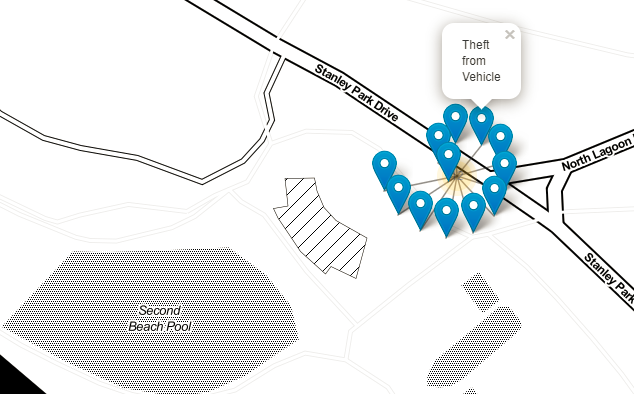

## Conclusion:
### Through this exploratory analysis of the Vancouver crime data:
### 1. I found that the most common crime in Vancouver is related to vehicle such "Theft from Vehicle", "Theft of Vehicle", "Theft of Bicycle" and "Vehicle Collision". Definitely, watch out for your bikes, motocycle, and cars. 
### 2. West End neighbourhood remain the most crime populated area from 2003 to 2019. The location record of crimes committed in West End can be used to draw a clear street map of West End.
### 3. The ocurrences of crimes are quite evenly distributed if crimes are counted by day or counted by month. However, crime occurs more in after work hours and midnight in Vancouver.
### 4. Folium is a great tool to visualize location data on openStreetMap.
### Please give an upvote if you like this kernel!

### NOTE:- I only generate heatmap for selected neighbourhood to avoid exceed the kernel size limit. Feel free to fork it to play along with the data.